# Predicting House prices (Regression)


 ### In this notebook we are going to predict housing prices for the boston housing data

In [1]:
import os
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore', module='sklearn')




## 1. Dataset


In [2]:
# importing Boston housing data set from archive.ics.uci.edu into pandas dataframe.


'''
 Attributes Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

'''

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                   header=None, sep='\s+')

data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 
                'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2




## Initial plan for data exploration

<ol>
    <li> Check for missing values, possible correlations. </li>
    <li> Use visualation and other tools to check if some features have impact on MEDV. </li>
</ol>

 


## 2. Exploratory Data Analysis (EDA)

In [3]:
df = data.copy() # Copying data to df and keeping data pristin 

In [4]:
df.shape # Number of rows and columns

(506, 14)

In [5]:
df.dtypes # Check data-type in df, no object type data (all numeric)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


**We do not have any object datatype so no need for One Hot Encoding (Feature Engineering) for this dataset.** 


In [6]:
df.isna().sum()  #Checking for null values ( None of them are null )

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Notable highlights form the data.

<ol>
    <li> CRIM (per capita crime rate by town):: Q3 (75%) = 3.67, Median = 0.25, Max = 88.97. It seems this feature may have lot of outliers. </li>
    <li> AGE (proportion of owner-occupied units built prior to 1940):: Mean = 68.57, Median = 77.50. It seems quite high i.e. lot of old buildings. </li>
    
</ol>

 


## Visualization of the data

In [8]:
cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']

nrows = 4
ncols = 3
fig, ax  = plt.subplots(nrows, ncols, figsize=(12,12))

for ii in range(len(cols)):
    row = ii % nrows
    col = ii % ncols
    
    ax[row][col].scatter(data.MEDV.values, data[cols[ii]].values, alpha = 0.2)
    ax[row][col].set_xlabel('MEDV')
    ax[row][col].set_ylabel(cols[ii])
    
plt.tight_layout()

 ### From the above scatterplot we observe: 
(1) Positive correlation between RM and MEDV (i.e average number of rooms per dwelling vs. Median value of owner-occupied homes in 1000's). <br> 
 (2) Negative correlation between LSTAT and MEDV (i.e. percentage lower status of the population vs. Median value of owner-occupied homes in 1000's). <br> 

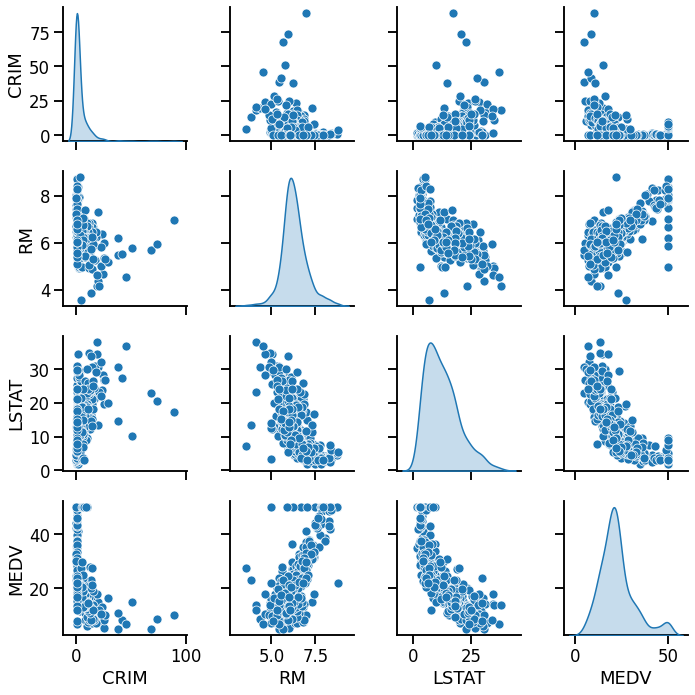

In [9]:
%matplotlib inline 
sns.set_context('talk')

cols = ['CRIM', 'RM', 'LSTAT', 'MEDV']

plot_data = df[cols]

sns.pairplot(plot_data, diag_kind ='kde')
plt.tight_layout()
plt.show()

### From above pairplot 

**We further observe negative correlation between LSTAT and RM.**

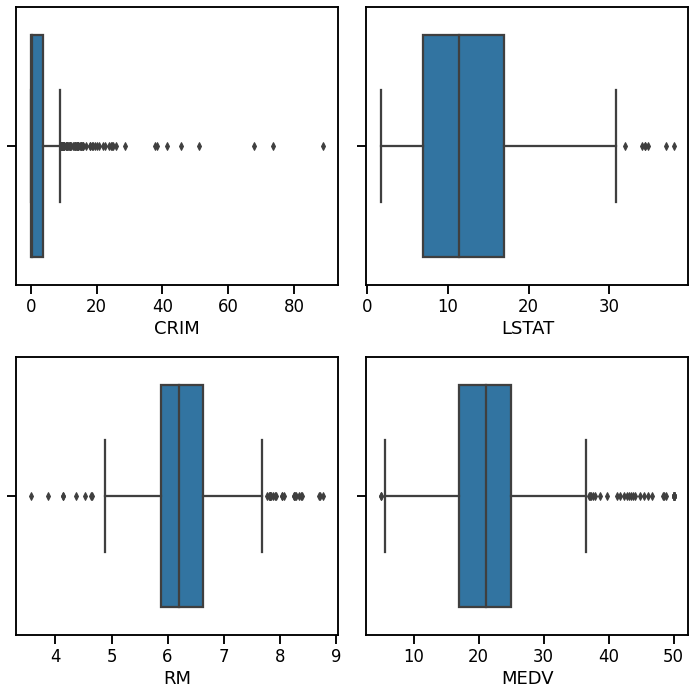

In [10]:
cols = ['CRIM', 'RM', 'LSTAT', 'MEDV']

nrows = 2
ncols = 2

fig, ax  = plt.subplots(nrows, ncols, figsize=(10,10))


for ii in range(len(cols)):
    
    row = ii % nrows
    col = ii // ncols

    
    sns.boxplot(ax = ax[row,col], x= cols[ii], data =df)
  

plt.tight_layout()
plt.show()

In [11]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 
                'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


corrs = data[cols].corr()['MEDV'].sort_values()

index_list = list(corrs.index)
value_list = list(corrs.values)


corrs

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

In [12]:
#Lets only select features with correlation greater than abs(0.50)

selected_cols = []
for x, y in zip(index_list, value_list):
    if abs(y) >= 0.50:
        print(' %s  \t \t %f'%(x,y))
        selected_cols.append(x)

 LSTAT  	 	 -0.737663
 PTRATIO  	 	 -0.507787
 RM  	 	 0.695360
 MEDV  	 	 1.000000


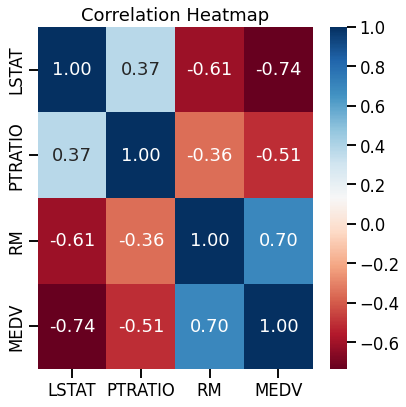

In [13]:
# Pearson correlation between the selected features

plt.figure(figsize = (6, 6))
from mlxtend.plotting import heatmap


cm = data[selected_cols].corr()

sns.heatmap(cm, cmap = 'RdBu', annot = True, fmt ='0.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Feature Correlations: 

For the features with pearson's correlations Coefficient (r) greater or equal to abs(0.5). We observer the following: 

- MEDV is positively correlated with RM (r = 0.70) and negatively correlated with LSTAT( r= -0.74) and PTRATIO (-0.51).
- RM and LSTAT are negatively correlated (r=-0.61).


# 3. Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

### Extracting data from the boston dataframe

In [15]:
X_total = df.drop('MEDV', axis = 1)
y_total = df.MEDV

### Visualizing MEDV

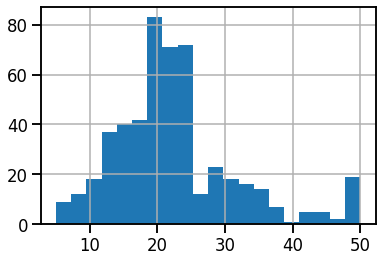

In [16]:
%matplotlib inline 
plt.grid()
plt.hist(y_total, bins = 20)
plt.show()

The MEDV values are slightly right skewed with peak around 20-25 in ($1000's) 

### Test and Train Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.15, random_state=42)

### K-fold

In [18]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

## 3(a). Linear regression 

In [19]:
s = StandardScaler()
lr = LinearRegression()

estimator_lr = Pipeline([("scaler", s),("regression", lr)])

#----------------------------- CV----------------------
predictions_CV = cross_val_predict(estimator_lr, X_train, y_train, cv=kf)

#------------------------------Train accuracy------------
estimator_lr.fit(X_train, y_train)
predictions_train = estimator_lr.predict(X_train)

#------------------------------Test accuracy 
predictions_test = estimator_lr.predict(X_test)

print("CV score        :", r2_score(y_train, predictions_CV))
print("Train (R2 score):", r2_score(y_train, predictions_train))
print("Test (R2 score) :", r2_score(y_test, predictions_test))

CV score        : 0.6757269673488233
Train (R2 score): 0.7320380961925158
Test (R2 score) : 0.7899225946923967


### Linear Regression with Polynomial of degree 2

In [20]:
s = StandardScaler()
lr = LinearRegression()
pf = PolynomialFeatures(degree=2)


estimator_lrp = Pipeline([("scaler", s),
                    ("make_higher_degree", pf),
                      ("regression", lr)])


#----------------------------- CV----------------------
predictions_CV = cross_val_predict(estimator_lrp, X_train, y_train, cv=kf)

#------------------------------Train accuracy------------
estimator_lrp.fit(X_train, y_train)
predictions_train = estimator_lrp.predict(X_train)

#------------------------------Test accuracy 
predictions_test = estimator_lrp.predict(X_test)

print("CV score        :", r2_score(y_train, predictions_CV))
print("Train (R2 score):", r2_score(y_train, predictions_train))
print("Test (R2 score) :", r2_score(y_test, predictions_test))

CV score        : 0.7459307244956475
Train (R2 score): 0.932063572243147
Test (R2 score) : 0.8598205631718165


In [21]:
estimator_lrp.fit(X_train, y_train)
print("Total Features without Polynomial         : ",X_train.shape[1])
print("Total Features with Polynomial (degree =2):",len(estimator_lrp.named_steps["regression"].coef_))

Total Features without Polynomial         :  13
Total Features with Polynomial (degree =2): 105


**Although our accuracy of prediction improved with the introduction of polynomial features. The accuracy from train to test decreased highlighting overfitting of some features.**

**Our features have increased from 13 (without polynomial) to 105. We will further investigate using regularization to resolve overfitting and reducing the model complexity in the below section.**

### 3(b) Ridge Regression

### Hyperparameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2],
    'ridge_regression__alpha': np.geomspace(2*1e-6, 2*1e1, num=20)
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(X_train, y_train)
grid.best_params_

{'polynomial_features__degree': 2,
 'ridge_regression__alpha': 8.562664797438774}

We will use the best parameters obtained from GridSearch to build regression model using Ridge Regression below.

In [23]:
estimator_Rp = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures(degree = 2)),
        ("ridge_regression", Ridge(alpha= 8.562))])


#----------------------------- CV----------------------
predictions_CV = cross_val_predict(estimator_Rp, X_train, y_train, cv=kf)

#------------------------------Train accuracy------------
estimator_Rp.fit(X_train, y_train)
predictions_train = estimator_Rp.predict(X_train)

#------------------------------Test accuracy 
predictions_test = estimator_Rp.predict(X_test)

print("CV score        :", r2_score(y_train, predictions_CV))
print("Train (R2 score):", r2_score(y_train, predictions_train))
print("Test (R2 score) :", r2_score(y_test, predictions_test))



CV score        : 0.8312748129837265
Train (R2 score): 0.9199832533688356
Test (R2 score) : 0.8955266011086827


In [24]:
estimator_Rp.fit(X_train, y_train)
print("Total Features without Polynomial         : ",X_train.shape[1])


NonZero_Rp = [x for x in list(estimator_Rp.named_steps["ridge_regression"].coef_) if abs(x) >= 0.01]

print("Total Features with Polynomial (degree =2):", len(NonZero_Rp))


Total Features without Polynomial         :  13
Total Features with Polynomial (degree =2): 101


In [25]:
estimator_Rp.named_steps["ridge_regression"].coef_

array([ 0.00000000e+00, -6.62726003e-02,  1.57205065e-01,  1.54090602e-01,
        9.68312890e-02, -1.02806047e+00,  3.40314210e+00, -8.86587121e-01,
       -2.32150322e+00,  9.92844295e-01, -1.13632022e+00, -6.83588188e-01,
        7.90803714e-01, -3.32245709e+00,  3.87732236e-02, -1.53140784e-02,
        7.59873517e-02,  2.29177133e+00, -6.45634967e-01,  8.89964445e-01,
        8.59414599e-02,  3.09334656e-02, -9.03828201e-01,  1.73995922e-01,
       -6.23928274e-02, -1.61012369e-01,  1.05867158e+00,  2.51291337e-01,
        2.02941902e-02,  7.90732451e-02, -1.45736562e-02, -3.67024800e-02,
        2.35283089e-04, -4.95813974e-01, -3.70540173e-01,  1.08029232e+00,
        1.50902481e-01, -9.14435940e-02, -5.76254159e-01,  8.10129457e-01,
       -5.02962441e-02,  1.09473028e+00,  7.11939998e-01,  6.21979048e-01,
        1.00691121e+00, -2.88723268e-02,  2.64197135e-01, -5.51360690e-01,
        4.29988430e-01, -7.60871969e-01,  3.27059534e-01, -8.67187818e-01,
       -8.34594739e-01,  

**We have managed to improve our test prediction and reduced the difference between train and test prediction by using Ridge regression.**



### 3(c) LASSO Regression

### Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2],
    'lasso_regression__alpha': np.geomspace(2*1e-6, 2*1e1, num=25),
    'lasso_regression__max_iter': [500000]
}

grid = GridSearchCV(estimator, params, cv=kf, n_jobs = -1)



In [27]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('lasso_regression', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso_regression__alpha': array([2.00000000e-06, 3.91468356e-06, 7.66237370e-06, 1.49978842e-05,
       2.93559854e-05, 5.74596967e-05, 1.12468265e-04, 2.20138834e-04,
       4.30886938e-04, 8.43393007e-04, 1.65080837e-03, 3.23119620e-03,
       6.32455532e-03, 1.23793164e-02, 2.42305532e-02, 4.74274741e-02,
       9.28317767e-02, 1.81703515e-01, 3.55655882e-01, 6.96140118e-01,
       1.36258414e+00, 2.66704286e+00, 5.22031443e+00, 1.02179395e+01,
       2.00000000e+01]),
                         'lasso_regression__max_iter': [500000],
                         'polynomial_features__degree': [1, 2]})

In [28]:
grid.best_params_

{'lasso_regression__alpha': 0.024230553172571806,
 'lasso_regression__max_iter': 500000,
 'polynomial_features__degree': 2}

In [29]:
estimator_Lp = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures(degree = 2)),
        ("lasso_regression", Lasso(alpha= 0.0242, max_iter= 500000))])


#----------------------------- CV----------------------
predictions_CV = cross_val_predict(estimator_Lp, X_train, y_train, cv=kf)

#------------------------------Train accuracy------------
estimator_Lp.fit(X_train, y_train)
predictions_train = estimator_Lp.predict(X_train)

#------------------------------Test accuracy 
predictions_test = estimator_Lp.predict(X_test)

print("CV score        :", r2_score(y_train, predictions_CV))
print("Train (R2 score):", r2_score(y_train, predictions_train))
print("Test (R2 score) :", r2_score(y_test, predictions_test))



CV score        : 0.8218676546512536
Train (R2 score): 0.9182828684136235
Test (R2 score) : 0.8962041804782569


In [30]:
estimator_Lp.fit(X_train, y_train)
print("Total Features without Polynomial         : ",X_train.shape[1])

NonZero_Lp = [x for x in list(estimator_Lp.named_steps["lasso_regression"].coef_) if abs(x) >= 0.01]
print("Total Features with Polynomial (degree =2):",len(NonZero_Lp))



Total Features without Polynomial         :  13
Total Features with Polynomial (degree =2): 65


**With LASSO Regression we have managed to reduce the model complexity while maintaing accuracy similar to Ridge regression**

In [31]:
df_importances = pd.DataFrame(zip(estimator_Lp.named_steps["polynomial_features"].get_feature_names(input_features= X_train.columns),
                 estimator_Lp.named_steps["lasso_regression"].coef_,
))

In [32]:
df_importances.columns = ['features', 'importances']

In [33]:
df_most_important = df_importances[abs(df_importances.importances) > 1.0]

df_most_important

,features,importances
5,NOX,-1.098783
6,RM,3.507751
8,DIS,-2.964955
9,RAD,1.195664
10,TAX,-1.602044
13,LSTAT,-3.533813
17,CRIM CHAS,3.779286
64,NOX RAD,-1.293770
72,RM RAD,-1.275552
79,AGE RAD,1.744242


**The most important coefficients consistent with our EDA analysis. RM and LSTAT have the highest absolute magnitude of coefficients**

### 3d. ElasticNet Regression 

In [34]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("elasticnet_regression", ElasticNet())])

params = {
    'polynomial_features__degree': [1, 2],
    'elasticnet_regression__alpha': np.geomspace(2*1e-6, 2*1e1, num=25),
    'elasticnet_regression__l1_ratio':np.linspace(0.1, 0.9, 9),
    'elasticnet_regression__max_iter': [500000]
}

grid = GridSearchCV(estimator, params, cv=kf, n_jobs = -1)




In [35]:
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('elasticnet_regression',
                                        ElasticNet())]),
             n_jobs=-1,
             param_grid={'elasticnet_regression__alpha': array([2.00000000e-06, 3.91468356e-06, 7.66237370e-06, 1.49978842e-05,
       2.93559854e-05, 5.7459696...
       6.32455532e-03, 1.23793164e-02, 2.42305532e-02, 4.74274741e-02,
       9.28317767e-02, 1.81703515e-01, 3.55655882e-01, 6.96140118e-01,
       1.36258414e+00, 2.66704286e+00, 5.22031443e+00, 1.02179395e+01,
       2.00000000e+01]),
                         'elasticnet_regression__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'elasticnet_regression__max_iter': [500000],
    

In [36]:
grid.best_params_

{'elasticnet_regression__alpha': 0.047427474113233115,
 'elasticnet_regression__l1_ratio': 0.1,
 'elasticnet_regression__max_iter': 500000,
 'polynomial_features__degree': 2}

In [37]:
estimator_ENp = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures(degree = 2)),
        ("elasticnet_regression", ElasticNet(alpha= 0.047, l1_ratio =0.1, max_iter= 500000))])


#----------------------------- CV----------------------
predictions_CV = cross_val_predict(estimator_ENp, X_train, y_train, cv=kf)

#------------------------------Train accuracy------------
estimator_ENp.fit(X_train, y_train)
predictions_train = estimator_ENp.predict(X_train)

#------------------------------Test accuracy 
predictions_test = estimator_ENp.predict(X_test)

print("CV score        :", r2_score(y_train, predictions_CV))
print("Train (R2 score):", r2_score(y_train, predictions_train))
print("Test (R2 score) :", r2_score(y_test, predictions_test))


CV score        : 0.8313374404755497
Train (R2 score): 0.9110953468997752
Test (R2 score) : 0.904971848865177


# 4. Evaluation of the models 

In [38]:
from sklearn.metrics import mean_squared_error

print("Linear Regression:")

estimator_lr.fit(X_train, y_train)
print("Train (RMSE) \t\t:%10.2f"%mean_squared_error(y_train, estimator_lr.predict(X_train)))
print("Test (RMSE) \t\t:%10.2f \n"%mean_squared_error(y_test, estimator_lr.predict(X_test)))    




print("Linear Regression (Polynomial, degree = 2):")

estimator_lrp.fit(X_train, y_train)
print("Train (RMSE) \t\t:%10.2f"%mean_squared_error(y_train, estimator_lrp.predict(X_train)))
print("Test  (RMSE) \t\t:%10.2f \n"%mean_squared_error(y_test, estimator_lrp.predict(X_test)))



print("Ridge Regression (Polynomial, degree = 2):")

estimator_Rp.fit(X_train,y_train)
print("Train (RMSE) \t\t:%10.2f"%mean_squared_error(y_train, estimator_Rp.predict(X_train)))
print("Test  (RMSE) \t\t:%10.2f\n"%mean_squared_error(y_test, estimator_Rp.predict(X_test)))



print("Lasso Regression (Polynomial, degree = 2):")

estimator_Lp.fit(X_train, y_train)
print("Train (RMSE) \t\t:%10.2f"%mean_squared_error(y_train, estimator_Lp.predict(X_train)))
print("Test  (RMSE) \t\t:%10.2f\n"%mean_squared_error(y_test, estimator_Lp.predict(X_test)))




print("ElasticNet Regression (Polynomial, degree = 2):")

estimator_ENp.fit(X_train, y_train)
print("Train (RMSE) \t\t:%10.2f"%mean_squared_error(y_train, estimator_ENp.predict(X_train)))
print("Test  (RMSE) \t\t:%10.2f"%mean_squared_error(y_test, estimator_ENp.predict(X_test)))




Linear Regression:
Train (RMSE) 		:     23.48
Test (RMSE) 		:     13.72 

Linear Regression (Polynomial, degree = 2):
Train (RMSE) 		:      5.95
Test  (RMSE) 		:      9.15 

Ridge Regression (Polynomial, degree = 2):
Train (RMSE) 		:      7.01
Test  (RMSE) 		:      6.82

Lasso Regression (Polynomial, degree = 2):
Train (RMSE) 		:      7.16
Test  (RMSE) 		:      6.78

ElasticNet Regression (Polynomial, degree = 2):
Train (RMSE) 		:      7.79
Test  (RMSE) 		:      6.21


In [39]:
print("Linear Regression:")

estimator_lr.fit(X_train, y_train)
print("Train (R2 score) \t\t:%10.2f"%r2_score(y_train, estimator_lr.predict(X_train)))
print("Test (R2 score) \t\t:%10.2f \n"%r2_score(y_test, estimator_lr.predict(X_test)))    


print("Linear Regression (Polynomial, degree = 2):")

estimator_lrp.fit(X_train, y_train)
print("Train (R2 score) \t\t:%10.2f"%r2_score(y_train, estimator_lrp.predict(X_train)))
print("Test  (R2 score) \t\t:%10.2f \n"%r2_score(y_test, estimator_lrp.predict(X_test)))


print("Ridge Regression (Polynomial, degree = 2):")

estimator_Rp.fit(X_train,y_train)
print("Train (R2 score) \t\t:%10.2f"%r2_score(y_train, estimator_Rp.predict(X_train)))
print("Test  (R2 score) \t\t:%10.2f\n"%r2_score(y_test, estimator_Rp.predict(X_test)))


print("Lasso Regression (Polynomial, degree = 2):")

estimator_Lp.fit(X_train, y_train)
print("Train (R2 score) \t\t:%10.2f"%r2_score(y_train, estimator_Lp.predict(X_train)))
print("Test  (R2 score) \t\t:%10.2f\n"%r2_score(y_test, estimator_Lp.predict(X_test)))


print("ElasticNet Regression (Polynomial, degree = 2):")

estimator_ENp.fit(X_train, y_train)
print("Train (R2 score) \t\t:%10.2f"%r2_score(y_train, estimator_ENp.predict(X_train)))
print("Test  (R2 score) \t\t:%10.2f\n"%r2_score(y_test, estimator_ENp.predict(X_test)))



Linear Regression:
Train (R2 score) 		:      0.73
Test (R2 score) 		:      0.79 

Linear Regression (Polynomial, degree = 2):
Train (R2 score) 		:      0.93
Test  (R2 score) 		:      0.86 

Ridge Regression (Polynomial, degree = 2):
Train (R2 score) 		:      0.92
Test  (R2 score) 		:      0.90

Lasso Regression (Polynomial, degree = 2):
Train (R2 score) 		:      0.92
Test  (R2 score) 		:      0.90

ElasticNet Regression (Polynomial, degree = 2):
Train (R2 score) 		:      0.91
Test  (R2 score) 		:      0.90



# 5. Summary

**We observe that for the boston housing data simple or plain linear regression does not give a good prediction.Addition of degree 2 polynomial improves the prediction while simultaneously increases the complexity and overfitting. This is observed my decrease in prediction accuracy (R2) for train and test datasets.**

**To overcome this problem I have use regularization with Ridge, Lasso and ElasticNet. 
All of the models help to reduce the complexity and helps us to obtain a model with similar prediction to the training dataset. 
All of these models were carried out with a polynomial of degree = 2 and gridsearch was carried out to fit the training data to find the appropriate hyperparameters for the model.**
